In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing data into dataframe
d=pd.read_csv('D:/analytics/practice/wine.csv')

In [147]:
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
d.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Missing value analysis

In [3]:
d.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory data analysis

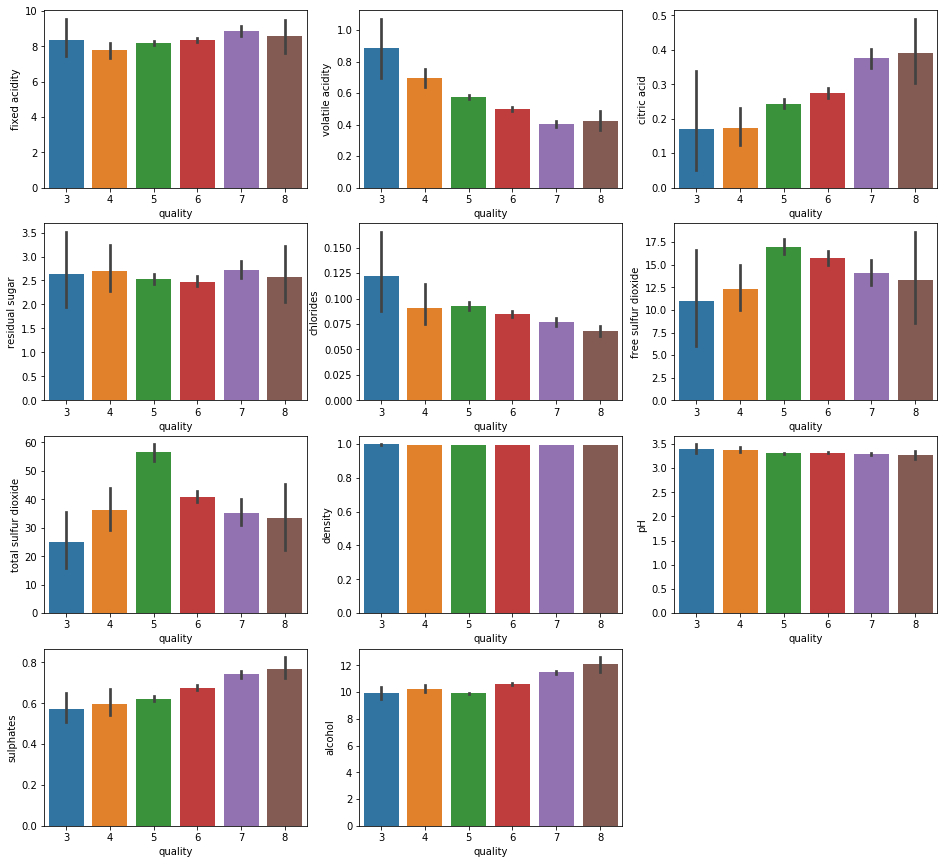

In [28]:
j=1
plt.figure(figsize=[16,15])
for i in d.columns[:11]:
    plt.subplot(4,3,j)
    sns.barplot(x=d['quality'],y=d[i])
    j+=1
plt.show()

# Outlier analysis

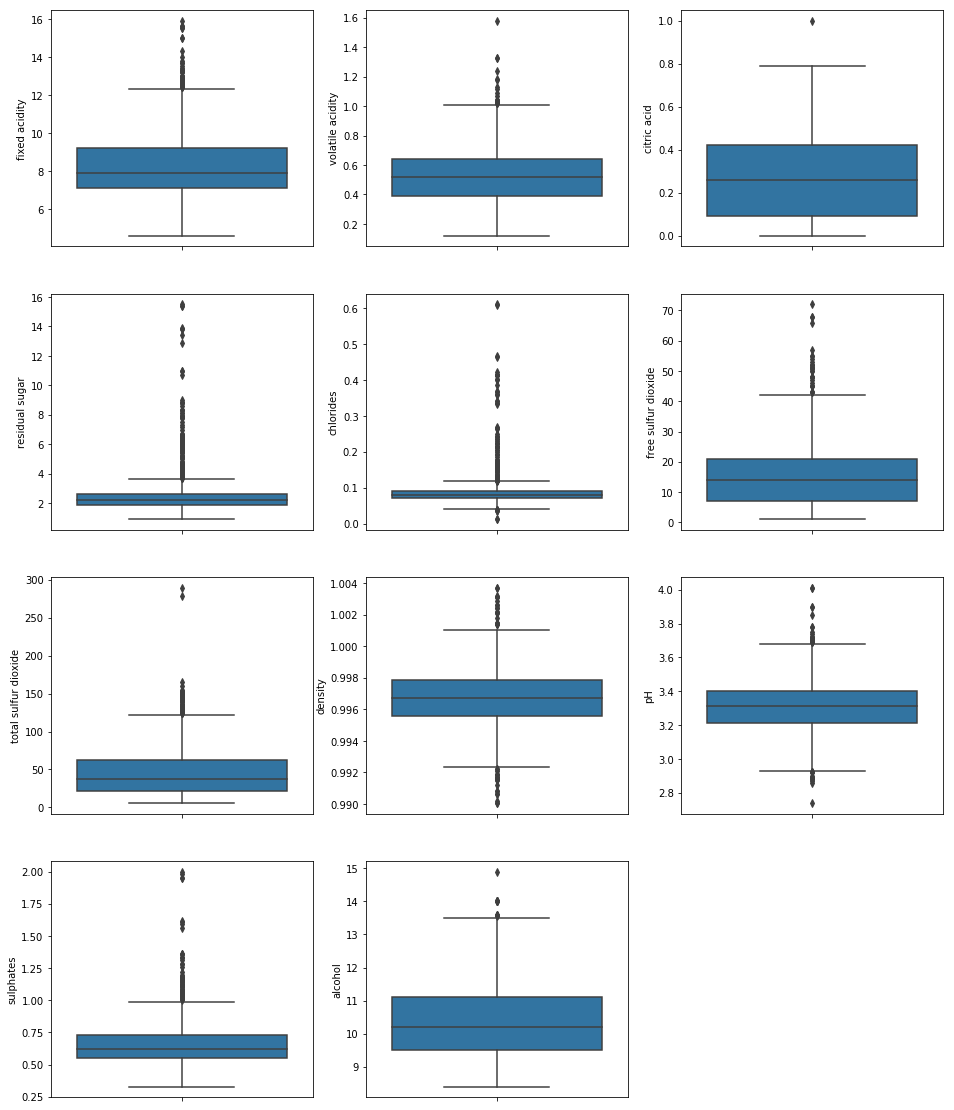

In [38]:
plt.figure(figsize=(16,20))
for i in range(11):
    plt.subplot(4,3,i+1)
    sns.boxplot(d[d.columns[i]],orient='v')
plt.show()

# Feature selection

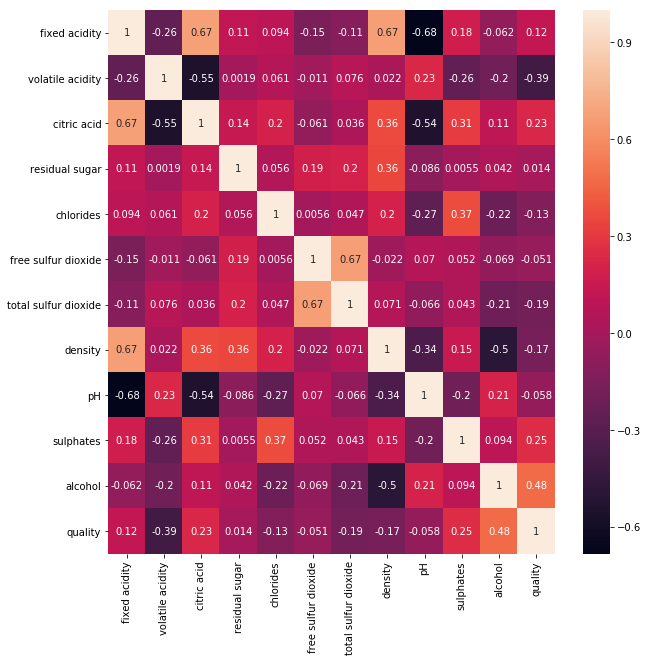

In [45]:
#correlation analysis
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(),annot=True)

# Feature scaling

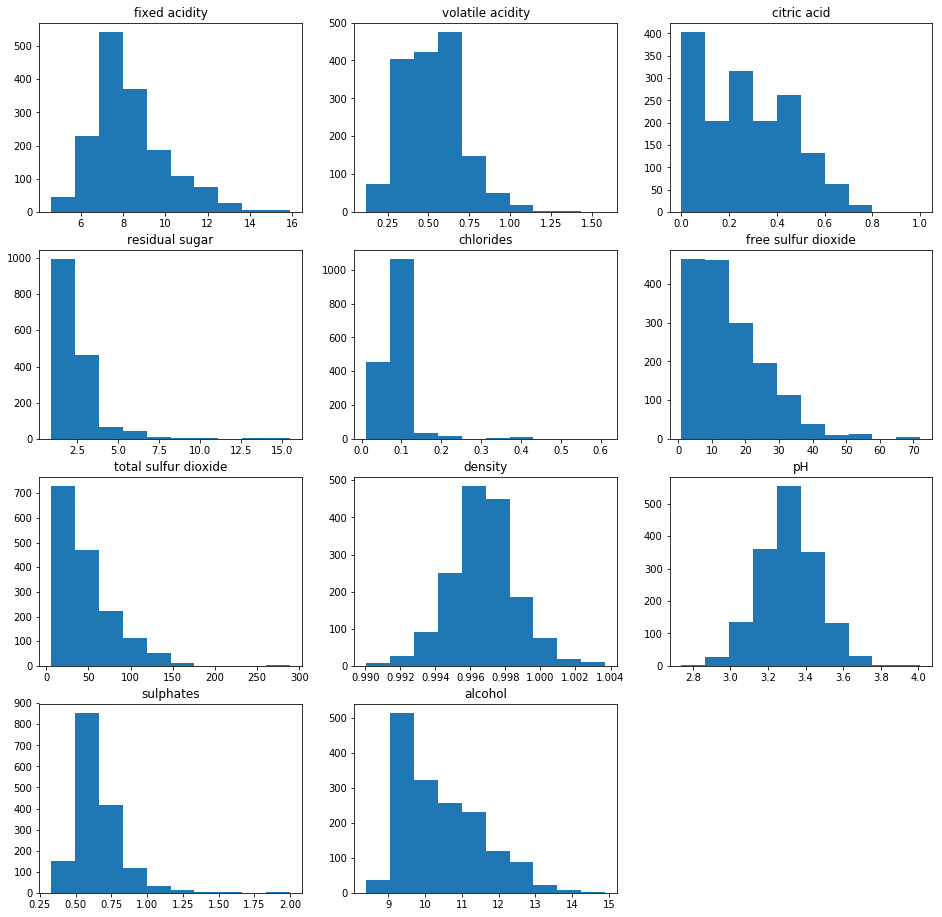

In [56]:
#Histograms are plotted for all the continuous variables to the normality
plt.figure(figsize=(16,16))
for i in range(11):
    plt.subplot(4,3,i+1)
    plt.hist(d[d.columns[i]])
    plt.title(d.columns[i])

# Modeling

In [47]:
#split the data into train and test
from sklearn.cross_validation import train_test_split
test,train=train_test_split(d,test_size=0.8)

In [49]:
test.shape

(319, 12)

# Decision tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def mape(x,y):
    return np.mean(np.abs((x-y)/x))

dt=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,:11],train.iloc[:,11])

p=dt.predict(test.iloc[:,:11]).round()

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.5611285266457681
MAPE: 0.09683908045977016


# Random forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=200).fit(train.iloc[:,:11],train.iloc[:,11])

p=rf.predict(test.iloc[:,:11])

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.4191692789968651
MAPE: 0.0760849380504553


# Gradient boosting

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(n_estimators=500).fit(train.iloc[:,:11],train.iloc[:,11])

p=gb.predict(test.iloc[:,:11])

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.4419206006025544
MAPE: 0.07978869642902751


# XGBoost

In [146]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=500).fit(train.iloc[:,:11],train.iloc[:,11])

p=xg.predict(test.iloc[:,:11])

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.4519488123890748
MAPE: 0.08194690951661825


# Linear regression

In [116]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(train.iloc[:,:11],train.iloc[:,11])

p=lr.predict(test.iloc[:,:11])

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.536801882594496
MAPE: 0.09717428168734887


# KNN

In [127]:
from sklearn.neighbors import KNeighborsRegressor

km=KNeighborsRegressor(n_neighbors=3).fit(train.iloc[:,:11],train.iloc[:,11])

p=km.predict(test.iloc[:,:11])

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.5496342737722048
MAPE: 0.10004478280340347


# Support vector machine

In [131]:
from sklearn.svm import SVR

sv=SVR().fit(train.iloc[:,:11],train.iloc[:,11])

p=sv.predict(test.iloc[:,:11])

print('MAE:',mean_absolute_error(test['quality'],p))
print('MAPE:',mape(test['quality'],p))

MAE: 0.4942948752405337
MAPE: 0.09062273934734383
